In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h1>Kernel Methods</h1>

<p>kernel methods make it possible to represent the inputs in a higher dimensional space implicitly, without actually calculating new variables.  They can only be used with linear modeling algorithm which only depend on dot products in both model creation and predictions - SVM (Support Vector Machines) and SVR (Support Vector Regression)</p>

<p>By Departing from the simple error minimization approach, they may achieve better generalization capabilities and overfitting resistance.</p>

In [50]:
from sklearn import datasets
data = datasets.load_iris()
X = data['data']
y = data['target']
y = map(lambda x: int(x == 0), y)
colors = ["#7fc97f","#beaed4","#fdc086"]

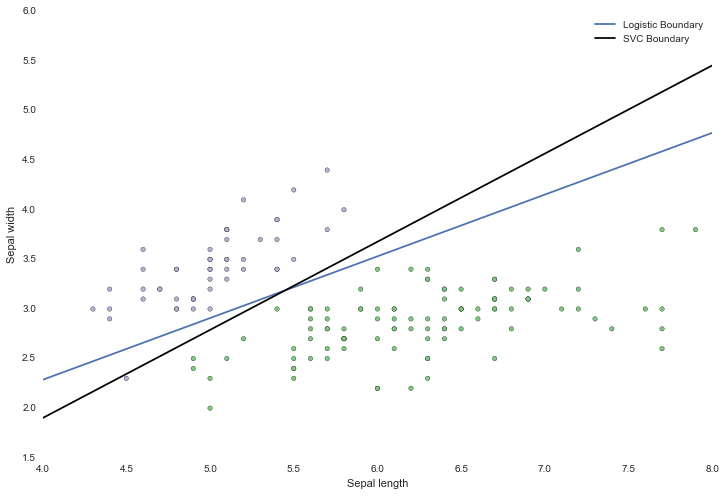

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X[:,0:2], y)

a, b, c = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]
domain = np.linspace(4.0, 8.5, 100)
db = lambda x: -(a/b) * x - (c/b)
plt.figure(figsize=(12,8))


plt.scatter(X[:, 0], X[:, 1], c=map(lambda x: colors[x], y))
plt.plot(domain, map(db, domain), label="Logistic Boundary")


clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X[:,0:2], y) 
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4.0, 8.0)
yy = a * xx - clf.intercept_[0] / w[1]
plt.plot(xx, yy, 'k-', label='SVC Boundary')

plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(4.0, 8.0)
plt.show()

<p>Unlike a logistic regression, a SVM tries to maximize the decision boundary between classes</p>

<h3>SVM Derivation</h3>
The simplest calse of the SVM cannot misclassify points, nor does it consider anything besides linear separability.
Suppose we have some data of the form (x_i, y_i), where x is a vector of real values and $y \in \{-1, 1\}$

any hyperplane can be written to satisfy

$$w⋅x - b = 0 $$

Where w is a vector normal to the hyperplane.


<b>If the training data are linearly separable</b>, we can select two hyperplanes is such a way that they separate the data, and then maximize the distance between them.  The region bound by them is called the margin.  These hyperplanes can be described by the equations

$$w⋅x - b = 1 $$
$$w⋅x - b = -1 $$

We would like to restrict data points from falling into the margin, we add the following constraints.

$w⋅x - b = \geq 1 $ for $x_i$ of class 1

$w⋅x - b = \leq-1 $ or $x_i$ of class -1

since $y_i \in \{1, -1\}$, we can rewrite this as one constraint.


$$y_i(w⋅x - b) \geq 1 $$


<h4>We want the margin to be as large as possilbe</h4>
Thus, the distance of any point $x_0$ to a hyperplane is given by $$\frac{|w⋅x_0 + b|}{||w||}$$

Thus the margin $\rho$ we wish to maximize is

$$\rho = \frac{1}{||w||}$$

This is equivalent to minimizing $$||w||$$ or $$\frac{1}{2}||w||^2$$

Thus the simpliest case SVM with a linear decision boundary correctly classifying every point can be written as the following convex optimization problem.


$\ \ \ \ \ \ \ \ \ \ min\ \frac{1}{2} ||w||^2$

s.t. $ \ \ \ \ y_i(w⋅x - b) \geq 1$

The SVM is in the class of quadradic optimization problems.  Specialized methods have been developed to solve SMVs, including the <b>block coordinate descent</b> algorithm.  

<h3>Support Vectors</h3>
We'll take the Lagrangian of the above optimization problem.  introducing lagrange variables $\alpha_i \geq 0, i \in [1, m]$.

$$L(w, b, \alpha) = \frac{1}{2}||w||^2 - \sum \limits_{i=1}^m \alpha_i[y_i(w⋅x - b) - 1]$$

$$\frac{\partial L}{\partial w} = w - \sum \limits_{i=1}^m \alpha_iy_ix_i = 0 \rightarrow w = \sum \limits_{i=1}^m \alpha_iy_ix_i$$

$$\frac{\partial L}{\partial b} = -\sum \limits_{i=1}^m \alpha_iy_y = 0 \rightarrow \sum \limits_{i=1}^m \alpha_iy_y = 0$$

$$\forall i, \alpha_i[y_i(w⋅x - b) - 1] = 0 \rightarrow \alpha_i = 0 \vee y_i(w⋅x - b) - 1$$


By the equations above, the weight vector w solution of the SVM problem is a linear combination of the training set vectors.  A vector $x_i$ appears in that expansion iff $al[ha_i \neq 0$, these vectors are called <b>support vectors</b>


<h3>Dual Optimization Problem</h3>
To derive the dual form of the constrained optimization problem, plug the Lagrangian definition of w into the above and simplifying.

$$L = \frac{1}{2}||\sum \limits_{i=1}^m \alpha_iy_ix_i ||^2  - \sum \limits_{i,j=1}^m \alpha_i\alpha_jy_iy_j(x_i ⋅ x_j) - \sum \limits_{i=1}^m \alpha_i y_i b + \sum \limits_{i=1}^m \alpha_i$$

$$L = \sum \limits_{i=1}^m \alpha_i - \frac{1}{2} \sum \limits_{i,j = 1}^m \alpha_i \alpha_j y_i y_j (x_i ⋅ x_j)$$

This leads to the following dual optimization problem for SVMs in the separable case

$$max \sum \limits_{i=1}^m \alpha_i - \frac{1}{2}\sum \limits_{i,j =1}^m \alpha_i\alpha_jy_iy_j(x_i ⋅ x_j)$$

$$s.t. \ \ \alpha_i \geq 0 \wedge \sum \limits_{i=1}^m \alpha_i y_i = 0, \forall i \in [1,m]$$

Once again this is a QP problem, the SMO algorithm is used to solve it in the more general non separable setting.  The  dual optimization problem reveals that <b>the SVM hypothesis only depends on inner products between vectors and not on the vectors themselves</b>

<h3>Sequential Minimal Optimization (SMO)</h3>
SMO is an algorithm for solving the QP that arises during the training of Support Vector Machines.  Invented by John Platt at Microsoft Research.  SMO is widely used for training support vector machines and is implemented in LIBSVM tool, no need for dinky third party solvers.

cs229.stanford.edu/materials/smo.pdf

<h3>Soft Margin</h3>
In 1995, Corinna Cortes and Vladimir N. Vapnik suggested a modified maximum margin idea that allows for misclassified points, soft margin.  Most real datasets will not be linearly separable.  Furthermore, misclassifying a single point that is a significant outlier may help the SVM generalize better.

We introduce non negative slack variables $\xi_i$ which measure the degree of misclassification.  The constraints become

$$y_i(w \cdot x + b) \geq 1 - \xi_i  $$

And the minimization objective now includes a tradeoff between a large margin and a small error $\sum_i \xi_i$

$$Min \ \ \frac{1}{2}||w||^2 + C \sum_{i=1}^n \xi_i $$

Note that the variable C is known as a hyperparameter; there is no "correct" value for C.  cross-validation could be used to find the value of C that minimizes the CV error.

Taking the lagrangian of the above optimization problem.


$$Min \ \ \frac{1}{2}||w||^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n y_i[w \cdot x_i + b - 1 + \xi_i] - \sum_{i=1}^n \beta_i \xi_i$$
